# Diabetes Patients Prediction

In [20]:
# Import all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [21]:
df = pd.read_csv("C:\\Users\\Navneet Raj\\Desktop\\diabetes data.csv")

In [22]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [23]:
# Checking the missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

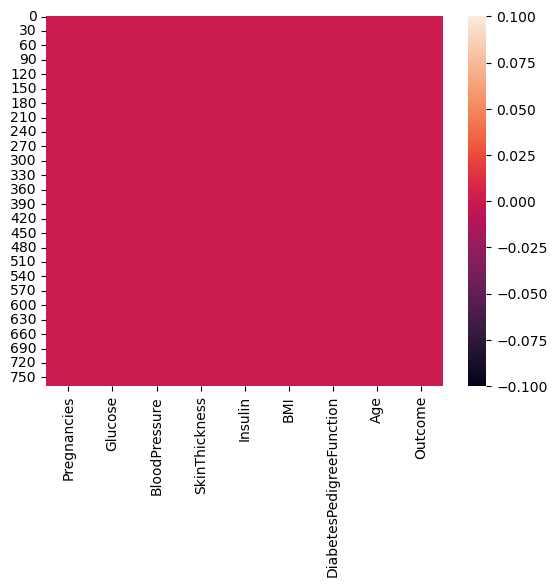

In [24]:
sns.heatmap(df.isnull())

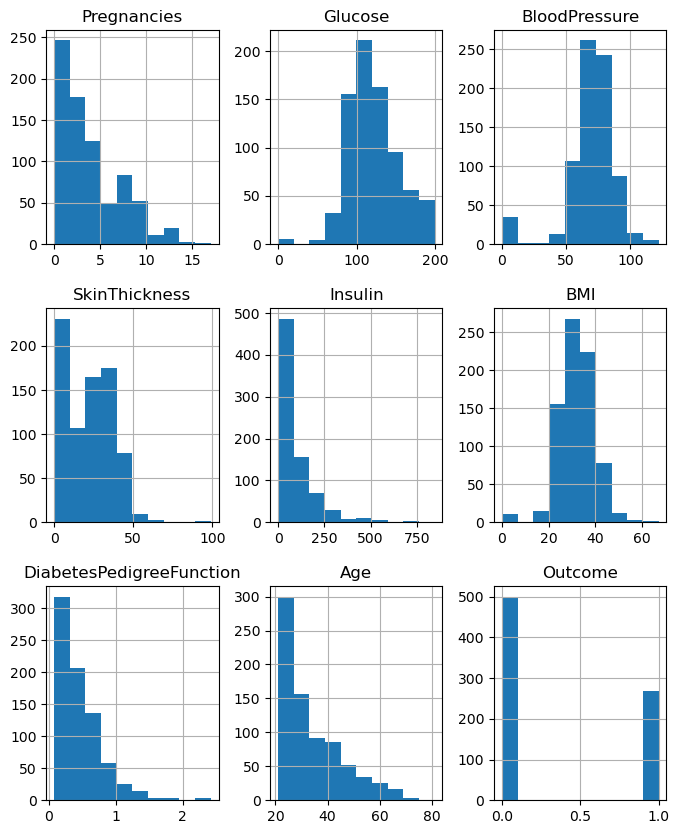

In [25]:
df.hist(figsize=(8,10))
plt.show()

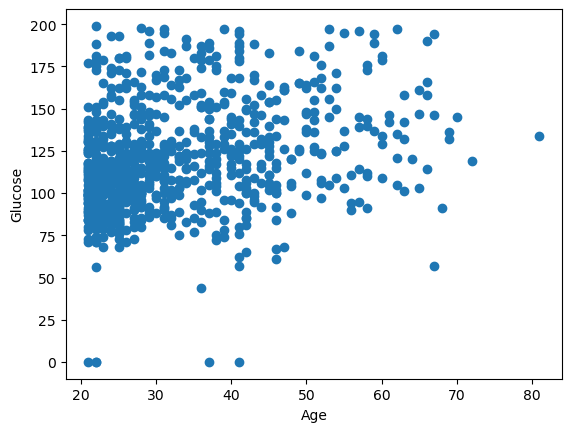

In [26]:
plt.scatter(df['Age'], df['Glucose'])
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.show()

In [27]:
correlation = df.corr()

In [28]:
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

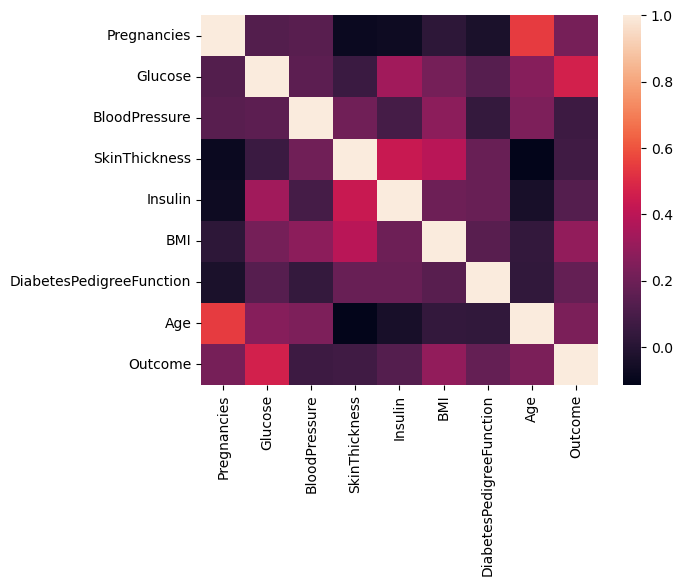

In [29]:
sns.heatmap(correlation)

In [30]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [31]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [32]:
X = df.drop(columns='Outcome', axis=1)
Y = df['Outcome']

In [33]:
# Train the model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [34]:
rfc = RandomForestClassifier()

In [35]:
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [36]:
# Evaluate the Model
Y_pred = rfc.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
'accuracy:',accuracy

('accuracy:', 0.78125)

The patient is not diabetic


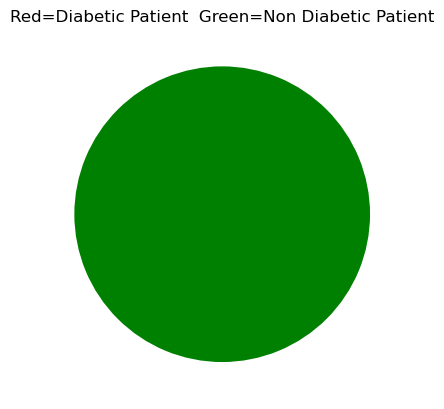

In [40]:
# Make a prediction on new data
new_patient = np.array([[10,139,80,0,0,27.1,1.441,57]])
prediction = rfc.predict(new_patient)

if prediction[0] == 0:
  print('The patient is not diabetic')
else:
  print('The patient is diabetic')

#Pie chart shows person is diabetic or not diabetic
colors = ['red', 'green']
prediction = [prediction[0], 1 - prediction[0]]
plt.pie(prediction, colors=colors)
plt.title('Red=Diabetic Patient  Green=Non Diabetic Patient')
plt.show()

In [38]:
import warnings
warnings.filterwarnings('ignore')